# Preparando ambiente

In [1]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sns
#import missingno           as msno
import numpy               as np
import requests
import zipfile
import lxml.html
import os

%matplotlib inline

pd.set_option('display.max_columns',500)


# Obtendo dados

In [2]:
#df             = pd.read_excel('/ambiente/datasciece-dev/dataset-megasena/resultados.xlsx')
#Faz download do arquivo de historico da megasena, converte para dataframe e salva em arquivo .csv
def download_megasena_data():
    print('Download dos resultados da megasena...')
    url = 'http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip'
    myfile = requests.get(url)
    temp_directory = './temp'

    if not os.path.exists(temp_directory):
        os.makedirs(temp_directory)

    open(temp_directory + '/resultados_megasena.zip', 'wb').write(myfile.content)

    # Unzip do arquivo
    print('Descompactando arquivo...')
    zip_ref = zipfile.ZipFile(temp_directory + '/resultados_megasena.zip', 'r')
    zip_ref.extractall(temp_directory)
    zip_ref.close()

    # Converte o html para data frame do pandas
    print('Convertendo dados...')
    df_list = pd.read_html(temp_directory + '/d_mega.htm')
    df = df_list[0]

    # Remove duplicados - a conversão do html repete resultados com mais de 1 ganhador
    print('Processando dados...')
    df.drop_duplicates(subset ="Concurso",keep = 'first', inplace = True) 

    print('Salvando arquivo resultados_megasena.csv...')
    #for i, df in enumerate(df_list):
    df.to_csv('resultados_megasena.csv')
    #df.head()
    return (df)


# download dos dados da megasena
download_megasena_data()

Download dos resultados da megasena...
Descompactando arquivo...
Convertendo dados...
Processando dados...
Salvando arquivo resultados_megasena.csv...


,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1,11/03/1996,41,5,4,52,30,33,000,0,&nbsp,&nbsp,000,17,39.15892,2016,33021.0,SIM,1.714.65023,000,000
1,2,18/03/1996,9,39,37,49,43,41,000,1,NaN,PR,2.307.16223,65,14.42402,4488,20891.0,NÃO,000,000,000
2,3,25/03/1996,36,30,10,11,29,47,000,2,NaN,RN,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
4,4,01/04/1996,6,59,42,27,1,5,000,0,&nbsp,&nbsp,000,39,15.32224,3311,18048.0,SIM,717.08075,000,000
5,5,08/04/1996,1,19,46,6,16,2,000,0,&nbsp,&nbsp,000,98,5.31810,5399,9653.0,SIM,1.342.48885,000,000
6,6,15/04/1996,19,40,7,13,22,47,000,0,&nbsp,&nbsp,000,109,7.21466,7147,11003.0,SIM,2.286.16633,000,000
7,7,22/04/1996,56,38,21,20,3,5,000,0,&nbsp,&nbsp,000,100,8.74605,5736,15248.0,SIM,3.335.69228,000,000
8,8,29/04/1996,53,17,38,4,47,37,000,0,&nbsp,&nbsp,000,60,16.08411,5262,18340.0,SIM,4.493.74819,000,000
9,9,06/05/1996,55,43,56,54,8,60,000,0,&nbsp,&nbsp,000,17,60.04379,2175,46931.0,SIM,5.718.64149,000,000
10,10,13/05/1996,25,4,18,57,21,38,000,0,&nbsp,&nbsp,000,251,6.63845,12590,13235.0,SIM,13.334.76981,000,000


# Carrega dados do arquivo *.csv

In [3]:
# Le arquivo de dados# the histogram of the data
df = pd.read_csv("resultados_megasena.csv")

# Gera lista com todas dezenas
dezenas = pd.DataFrame(df['1ª Dezena'].tolist() + df['2ª Dezena'].tolist() + df['3ª Dezena'].tolist() + df['4ª Dezena'].tolist() + df['5ª Dezena'].tolist() + df['6ª Dezena'].tolist(), columns=['numeros'])

sequence = pd.DataFrame(df[['1ª Dezena','2ª Dezena','3ª Dezena','4ª Dezena','5ª Dezena','6ª Dezena',]]).to_numpy()

print(sequence)

[[41  5  4 52 30 33]
 [ 9 39 37 49 43 41]
 [36 30 10 11 29 47]
 ...
 [59 47 46 19 39 22]
 [51 13 43 30 34 26]
 [51 15 52 36 59 45]]


# Analise dezenas sorteadas

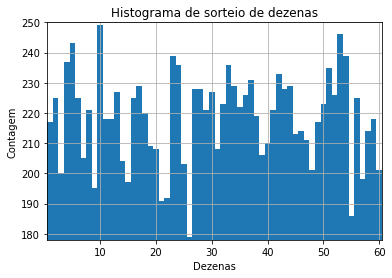

Frequencia das Dezenas
10    249
53    246
5     243
54    239
23    239
4     237
24    236
33    236
51    235
42    233
37    231
34    229
17    229
44    229
43    228
28    228
27    228
30    227
13    227
52    226
36    226
6     225
2     225
16    225
56    225
32    223
50    223
35    222
41    221
8     221
29    221
18    220
38    219
12    218
11    218
59    218
1     217
49    217
46    214
58    214
45    213
47    211
40    210
19    209
31    208
20    208
39    206
7     205
14    204
25    203
60    201
48    201
3     200
57    198
15    197
9     195
22    192
21    191
55    186
26    179
Name: numeros, dtype: int64


In [4]:
# Histograma
n, bins, patches = plt.hist(dezenas.to_numpy(), bins= np.arange(1 - 0.5, 60 + 0.5 + 1, 1))
plt.xlabel('Dezenas')
plt.ylabel('Contagem')
plt.title('Histograma de sorteio de dezenas')
plt.xlim(0.5, 60.5)
plt.ylim(min(n)-1, max(n)+1)
plt.grid(True)
plt.show()


# Mostra frequencia das dezenas
print('Frequencia das Dezenas')
print(dezenas['numeros'].value_counts().sort_values(ascending=False))


# RNN Simples

In [5]:
import tensorflow as tf

n_steps = 20
n_inputs = 6
n_neurons = 100
n_outputs = 6
# TODO: precisa desse -1?
i_min, i_max = 0, len(sequence)-n_steps-1

def time_series(i):
    return sequence[i,:]

# falta incorporar batch_size aqui
def next_batch(batch_size, n_steps):
    i0 = np.random.randint(i_max,size=(batch_size,1))
    Is = i0 + np.arange(0., n_steps + 1)
    ys = time_series(Is.astype(int))
    return ys[:, :-1].reshape(-1, n_steps, 6), ys[:, 1:].reshape(-1, n_steps, 6)

#X_batch, y_batch = m_next_batch(2, n_steps)


In [6]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [7]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

W0903 18:43:16.628926 139739332384512 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0903 18:43:16.630008 139739332384512 deprecation.py:323] From <ipython-input-7-23da08f31389>:2: BasicRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [8]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

W0903 18:43:16.641788 139739332384512 deprecation.py:323] From <ipython-input-8-f7b88a02a855>:1: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0903 18:43:16.886594 139739332384512 deprecation.py:506] From /home/jairo/anaconda3/envs/mlstudy/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0903 18:43:16.900382 139739332384512 deprecation.py:506] From /home/jairo/anaconda3/envs/mlstudy/lib/python3.7/site-packages/tensorflow/python/ops/rnn_cell_impl.py:459: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a futur

In [9]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [10]:
saver = tf.train.Saver()

In [11]:
n_iterations = 50000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 1356.9415
100 	MSE: 315.902
200 	MSE: 305.62686
300 	MSE: 307.28604
400 	MSE: 293.63797
500 	MSE: 283.56778
600 	MSE: 277.1946
700 	MSE: 273.64975
800 	MSE: 265.54544
900 	MSE: 255.7073
1000 	MSE: 248.82533
1100 	MSE: 242.45404
1200 	MSE: 241.35504
1300 	MSE: 229.92859
1400 	MSE: 221.74725
1500 	MSE: 218.9145
1600 	MSE: 210.22833
1700 	MSE: 210.45045
1800 	MSE: 202.48904
1900 	MSE: 200.94872
2000 	MSE: 198.88054
2100 	MSE: 197.30263
2200 	MSE: 186.08624
2300 	MSE: 189.8372
2400 	MSE: 191.49384
2500 	MSE: 184.19655
2600 	MSE: 179.02177
2700 	MSE: 180.76328
2800 	MSE: 174.86267
2900 	MSE: 175.44006
3000 	MSE: 174.6207
3100 	MSE: 180.76016
3200 	MSE: 170.9522
3300 	MSE: 172.62186
3400 	MSE: 163.67374
3500 	MSE: 166.45222
3600 	MSE: 161.6315
3700 	MSE: 158.14308
3800 	MSE: 163.38025
3900 	MSE: 157.88554
4000 	MSE: 160.68204
4100 	MSE: 152.51624
4200 	MSE: 158.31079
4300 	MSE: 154.7764
4400 	MSE: 154.46931
4500 	MSE: 158.98619
4600 	MSE: 155.243
4700 	MSE: 150.21791
4800 	MSE: 152.4

37700 	MSE: 110.446846
37800 	MSE: 106.911125
37900 	MSE: 111.22959
38000 	MSE: 104.2985
38100 	MSE: 112.68693
38200 	MSE: 106.991585
38300 	MSE: 111.05087
38400 	MSE: 108.178604
38500 	MSE: 107.789894
38600 	MSE: 105.33047
38700 	MSE: 113.14391
38800 	MSE: 111.06806
38900 	MSE: 108.536575
39000 	MSE: 111.19191
39100 	MSE: 107.35318
39200 	MSE: 108.28052
39300 	MSE: 111.306625
39400 	MSE: 107.11951
39500 	MSE: 108.63108
39600 	MSE: 105.78864
39700 	MSE: 108.06219
39800 	MSE: 112.397896
39900 	MSE: 108.88458
40000 	MSE: 106.00464
40100 	MSE: 108.75441
40200 	MSE: 106.69839
40300 	MSE: 107.11915
40400 	MSE: 112.55241
40500 	MSE: 112.33956
40600 	MSE: 105.994545
40700 	MSE: 106.46561
40800 	MSE: 107.88362
40900 	MSE: 105.83476
41000 	MSE: 103.80452
41100 	MSE: 107.93317
41200 	MSE: 110.57165
41300 	MSE: 104.19842
41400 	MSE: 107.97325
41500 	MSE: 112.13071
41600 	MSE: 109.056274
41700 	MSE: 106.24
41800 	MSE: 109.37722
41900 	MSE: 105.88741
42000 	MSE: 111.28254
42100 	MSE: 110.45469
4220

In [12]:
#faz predicao do proximo valor
last_i = len(sequence)
t_instance = np.arange(last_i-n_steps,last_i)
#np.linspace(100, 100 + (n_steps + 1), n_steps + 1)
#print(t_instance)
#len(sequence)

In [13]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_time_series_model")   # not shown

    #X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    X_new = time_series(t_instance).reshape(-1, n_steps, n_inputs)
    y_pred = sess.run(outputs, feed_dict={X: X_new})

W0903 19:08:38.426859 139739332384512 deprecation.py:323] From /home/jairo/anaconda3/envs/mlstudy/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [14]:
y_pred

array([[[30.59603   , 39.07716   , 32.982628  , 35.260895  ,
         30.688387  , 28.464481  ],
        [43.151363  , 28.220772  , 19.337563  , 36.461952  ,
         26.225405  , 28.911352  ],
        [39.144054  , 33.7477    , 41.114243  , 20.366302  ,
         27.078802  , 40.551903  ],
        [30.901484  ,  8.06778   , 21.414223  , 36.033924  ,
         37.82967   , 34.724987  ],
        [21.992237  , 22.251406  , 26.667976  , 29.194817  ,
         40.24409   , 46.87455   ],
        [21.773954  , 40.219368  , 43.97892   , 19.819443  ,
         43.031853  , 36.337013  ],
        [30.875656  , 41.886986  , 40.101078  , 36.901768  ,
         31.121006  , 13.313791  ],
        [12.330404  , 34.052856  , 52.44049   , 29.05563   ,
         12.955702  , 34.990257  ],
        [35.175354  , 15.603077  , 38.764084  , 52.647064  ,
         37.401455  , 37.15536   ],
        [41.236393  , 51.247417  ,  0.26430035, 29.948563  ,
         39.67209   , 16.773432  ],
        [32.704964  , 10.11660